# RHEOS Tutorials



In [8]:
using RHEOS

PyPlot needs to be installed to run these examples and display plots of the data.

In [2]:
using PyPlot

# Example 1

- Loading experimental data from csv file
- Fitting model
- Comparing original data with fit




┌ Warning: Please note that NaN data rows are not included in resultant data struct.
└ @ RHEOS /home/alessandra/.julia/dev/RHEOS/src/IO.jl:11
┌ Warning: Initial values for model parameters is set to [0.5, 0.5] by default
└ @ RHEOS /home/alessandra/.julia/dev/RHEOS/src/processing.jl:212


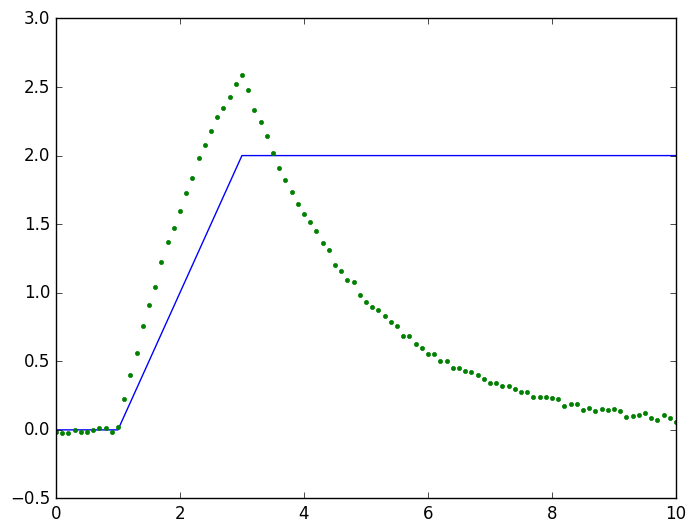

Time: 2.250041494 s, Why: XTOL_REACHED, Parameters: [4.0054, 2.003], Error: 0.022310985023644148


In [3]:
# Make sure the examples folder is the current directory
# check by typing "pwd()"

# Import data
data = importcsv("example1_data.csv", t_col=1, ϵ_col=2, σ_col=3)

# Plot data
plot(data.t,data.ϵ,"-")
plot(data.t,data.σ,".")

# We now fit a Maxwell model
maxwell_model = modelfit(data, Maxwell, strain_imposed);



Note that the fitting function requires guidance regarding the type of testing used.
It helps optimise the fitting process.

The data in this example is the stress response to a strain ramp followed by plateau.
It therefore corresponds to a strain imposed process.


We now want to calculate the stress values predicted by the model given the experimental strain data.
Lets create a new data set with the strain profile


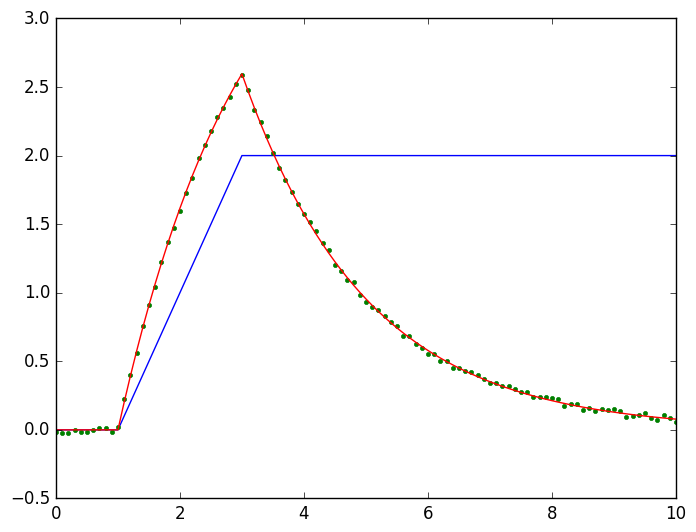

In [4]:
maxwell_predict = extract(data, strain_only)
# and calculate the stress based on the model
maxwell_predict = modelpredict(maxwell_predict, maxwell_model)
# Now we can plot data and model together for comparison

# Plot data
plot(data.t,data.ϵ,"-")
plot(data.t,data.σ,".")
plot(maxwell_predict.t,maxwell_predict.σ);

# Example 2

This script is a slight modification of Example 1 to present to the user the possibility of creating new RheoModelClass from an existing one with some of the parameters frozen to specific values. As an example, we fix the spring constant of the model above (k) to 2 and we let RHEOS fitting the viscosity $\eta$.

In [5]:
Maxwell_springFix = freeze_params(Maxwell, (k=2,))


Model name: maxwell with set parameters: (k = 2.0,)

Free parameters: η

                ___
            _____| |________╱╲  ╱╲  ╱╲  ___
                _|_|          ╲╱  ╲╱  ╲╱
                  η                  k
               

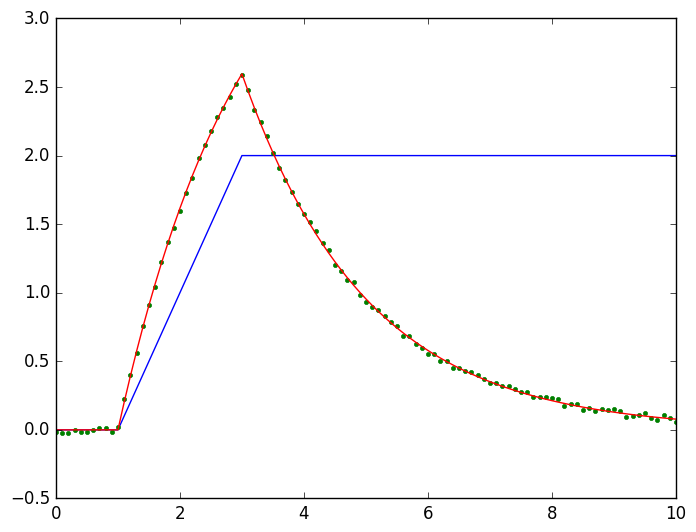

Time: 0.017260606 s, Why: XTOL_REACHED, Parameters: [4.00555], Error: 0.022412669261910323


┌ Warning: Initial values for model parameters is set to [0.5] by default
└ @ RHEOS /home/alessandra/.julia/dev/RHEOS/src/processing.jl:212


In [6]:
maxwellD_model = modelfit(data, Maxwell_springFix, strain_imposed)
maxwellD_predict = extract(data, strain_only)
# and calculate the stress based on the model
maxwellD_predict = modelpredict(maxwellD_predict, maxwellD_model)
# Now we can plot data and model together for comparison

# Plot data
plot(data.t,data.ϵ,"-")
plot(data.t,data.σ,".")
plot(maxwell_predict.t,maxwell_predict.σ);


# Example 3

This script shows how to use RHEOS to explore the behaviour of various models
This involves:

- Creating a strain function
- Defining models based on parameter values


PyPlot needs to be installed to run these examples and display plots of the data.

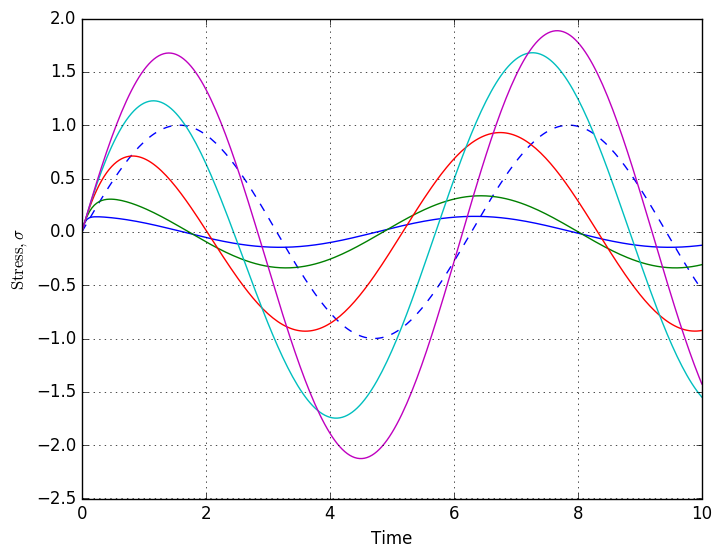

In [7]:
# Creates a time only dataset
dϵ=timeline()
# calculates strain data by applying a function of time
dϵ=strainfunction(dϵ,t->sin(t))

# Plot strain data
plot(dϵ.t,dϵ.ϵ,"--b")


# we can now simulate various models based on this strain only dataset
# Let's study the role of the dashpot strength in the MAxwell model
for η in [0.1, 0.3, 1, 3, 10]
    maxwell_model = RheoModel(Maxwell, k = 2., η = η)
    d_maxwell = modelpredict(dϵ, maxwell_model)
    plot(d_maxwell.t,d_maxwell.σ)
end
xlabel("Time")
ylabel("Stress")
grid("on")